In [1]:
import pandas as pd 
import numpy as np
from tensorflow.keras.preprocessing.image import * 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import random
import os 
import shutil

# 훈련 데이터 복사

In [2]:
src_path = './datasets/train/' # 기존 폴더 경로 
new_path = "C:\\Users\\jesung\\Downloads\\test\\train" # 옮길 폴더 경로 


folders = os.listdir(src_path)
for folder in folders:
    folder_path = src_path + "/" + folder
    files = os.listdir(folder_path)
    
    for file in files:
        shutil.copy(folder_path+"/"+file, new_path)

# 테스트 데이터 복사

In [3]:
test_src_path = './datasets/test/' # 기존 폴더 경로 
test_new_path = "C:\\Users\\jesung\\Downloads\\test\\test" # 옮길 폴더 경로 


folders = os.listdir(test_src_path)
for folder in folders:
    folder_path = test_src_path + "/" + folder
    files = os.listdir(folder_path)
    
    for file in files:
        shutil.copy(folder_path+"/"+file, test_new_path)

In [4]:
src_path = './datasets/train/' # 기존 폴더 경로 
new_path = "C:\\Users\\jesung\\Downloads\\test\\train" # 옮길 폴더 경로 


folders = os.listdir(src_path)
for folder in folders:
    folder_path = src_path + "/" + folder
    files = os.listdir(folder_path)
    
    for file in files:
        shutil.copy(folder_path+"/"+file, new_path)

In [5]:
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

In [6]:
train_path = './datasets/train/'

In [7]:
foldernames = os.listdir(train_path)

In [8]:
# 데이터 형상 관련 상수 정의 
IMAGE_WIDTH=112
IMAGE_HEIGHT=112
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL=3

# 학습 데이터 준비 
foldernames = os.listdir(train_path)
all_filenames=[]  # 전체 폴더 파일
categories=[]    

for foldername in foldernames:
    filenames = os.listdir(train_path+foldernames[int(foldername)])
    all_filenames.extend(filenames) # 폴더별 전체 파일 더하기
    
    for filename in filenames:
        categories.append(int(foldername)) # 몇번째 폴덩인지로 클래스 이름 정하기

        
df=pd.DataFrame(
    {"filename":all_filenames,
    "category":categories}
)        
df

,filename,category
0,1.jpg,0
1,10.jpg,0
2,100.jpg,0
3,101.jpg,0
4,102.jpg,0
...,...,...
765,666.jpg,9
766,667.jpg,9
767,668.jpg,9
768,669.jpg,9


<AxesSubplot:>

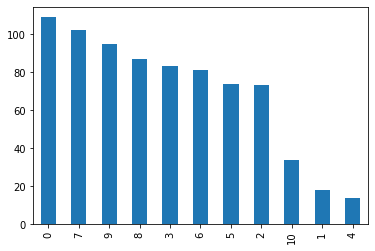

In [9]:
df['category'].value_counts().plot.bar()

In [10]:
df['category'].dtypes

dtype('int64')

In [11]:
df = df.astype({'category':'string'})

In [12]:
df['category'].dtypes

string[python]

In [13]:
df

,filename,category
0,1.jpg,0
1,10.jpg,0
2,100.jpg,0
3,101.jpg,0
4,102.jpg,0
...,...,...
765,666.jpg,9
766,667.jpg,9
767,668.jpg,9
768,669.jpg,9


In [14]:
total_train=df.shape[0]
batch_size=15

# 트레이닝 데이터의 제너레이터 설정 
train_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1, 
        height_shift_range=0.1)
        
train_generator=train_datagen.flow_from_dataframe(
    df, 
    new_path,
    x_col = "filename", 
    y_col = "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )
    

Found 770 validated image filenames belonging to 11 classes.


# Model Initialize

In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(ResNet50(include_top=True, weights=None, input_shape=(112, 112, 3), classes=11))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 11)                23610251  
                                                                 
Total params: 23,610,251
Trainable params: 23,557,131
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
model.compile(optimizer="Adam", loss="mse", metrics=['accuracy'])

# 테스트

In [17]:
test_path = './datasets/test/'

In [18]:
#  테스트 데이터 준비 
foldernames = os.listdir(test_path)
all_filenames=[]  # 전체 폴더 파일

for foldername in foldernames:
    filenames = os.listdir(test_path+foldernames[int(foldername)])
    all_filenames.extend(filenames) # 폴더별 전체 파일 더하기
    
    for filename in filenames:
        categories.append(int(foldername)) # 몇번째 폴덩인지로 클래스 이름 정하기

        
test_df=pd.DataFrame({"filename":all_filenames,})        
test_df

,filename
0,110.jpg
1,129.jpg
2,706.jpg
3,707.jpg
4,708.jpg
...,...
79,302.jpg
80,384.jpg
81,487.jpg
82,575.jpg


In [19]:
nbsamples=test_df.shape[0]

In [20]:
test_datagen=ImageDataGenerator(rescale=1./255)
# 테스트 이미지니까, 사진 그대로 씀
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    test_new_path,
    x_col= "filename",
    y_col= None,
    target_size = IMAGE_SIZE,
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 84 validated image filenames.


# Training

In [21]:
epochs = 3 

history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data=  test_generator,
)

# 모델 저장 
model.save_weights("model.h5")

Epoch 1/3


C:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


52/52 [==============================] - 17s 228ms/step - loss: 0.1531 - accuracy: 0.1169 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
52/52 [==============================] - 11s 215ms/step - loss: 0.1596 - accuracy: 0.1208 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
52/52 [==============================] - 11s 215ms/step - loss: 0.1577 - accuracy: 0.1312 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [22]:
historyDict = history.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

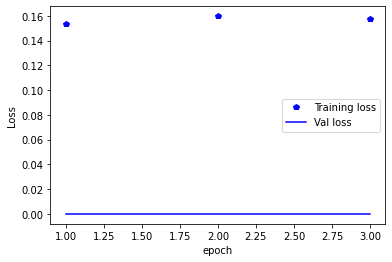

In [23]:
epo = range(1, len(acc)+1)
plt.plot(epo, loss, 'bp', label="Training loss")
plt.plot(epo, val_loss, 'b', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

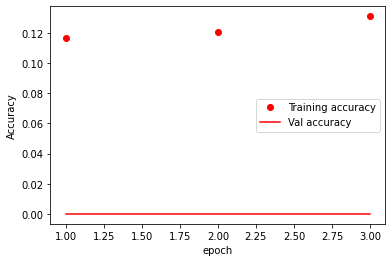

In [24]:
plt.plot(epo, acc, 'ro', label="Training accuracy")
plt.plot(epo, val_acc, 'r', label="Val accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()